<a href="https://colab.research.google.com/github/jeet1912/ms/blob/main/ds680/finalTermProject/finalNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scipy import stats
from sklearn.preprocessing import normalize
import requests
from bs4 import BeautifulSoup

# Sample Text

#### From Hugging Face

In [ ]:
splits = {'train': 'train.parquet', 'validation': 'validation.parquet', 'test': 'test.parquet'}
df1 = pd.read_parquet("hf://datasets/cornell-movie-review-data/rotten_tomatoes/" + splits["train"])
df2 = pd.read_parquet("hf://datasets/cornell-movie-review-data/rotten_tomatoes/" + splits["validation"])
df3 = pd.read_parquet("hf://datasets/cornell-movie-review-data/rotten_tomatoes/" + splits["test"])
df0 = pd.concat([df1, df2, df3])
for df in [df0, df1, df2, df3]:
  df.drop('label',axis=1,inplace=True)
df0.head()

text
0  the rock is destined to be the 21st century's ...
1  the gorgeously elaborate continuation of " the...
2                     effective but too-tepid biopic
3  if you sometimes like to go to the movies to h...
4  emerges as something rare , an issue movie tha...

In [ ]:
for df in [df0,df1,df2,df3]:
  print(df.shape)

(10662, 1)
(8530, 1)
(1066, 1)
(1066, 1)


In [ ]:
reviews = []
for df in [df1,df2,df3,df0]:
  review = df['text'].tolist()
  reviews.append(review)
print(len(reviews))

4


#### From web scraping to include blogs and articles

In [ ]:
def scrapeParagraphsFromWebsite(url):
  try:
    print(url)
    # Send a GET request to the URL
    response = requests.get(url)

    # Raise an exception for bad status codes
    response.raise_for_status()

    # Parse the HTML content
    soup = BeautifulSoup(response.content, "html.parser")

    # Find all paragraphs in the HTML
    paragraphs = soup.find_all("p")

    # Collect text of paragraphs into a list
    textCorpus = []

    for paragraph in paragraphs:
        textCorpus.append(paragraph.text)

    # Join all paragraph texts into one string
    text_corpus_string = " ".join(textCorpus)

    # Print the last 100 characters of the text corpus
    print(text_corpus_string[-10:])

    return text_corpus_string

  except requests.RequestException as e:
      print(f"Request failed: {e}")
      return None
  except Exception as e:
      print(f"An error occurred: {e}")
      return None

urls = ["https://www.npr.org/2022/04/10/1089652445/museums-turn-to-immersive-tech-to-preserve-the-stories-of-aging-holocaust-surviv","https://ia.samaltman.com/","https://blog.samaltman.com/reflections","https://www.theguardian.com/commentisfree/2024/dec/18/lesbian-mothers-scandal-custody-cases-families","https://www.nytimes.com/wirecutter/reviews/hide-wifi-router-maintain-signal/?campaign_id=290&emc=edit_wcd_20250127&instance_id=145906&nl=the-recommendation&regi_id=228774333&segment_id=189426&user_id=190509cfe7a0a183c26b1d1dd1d21fc6"]
textCorpuses = []
for eachURL in urls:
  textCorpus = scrapeParagraphsFromWebsite(eachURL)
  textCorpuses.append(textCorpus)

https://www.npr.org/2022/04/10/1089652445/museums-turn-to-immersive-tech-to-preserve-the-stories-of-aging-holocaust-surviv
PR sponsor
https://ia.samaltman.com/
maginable.
https://blog.samaltman.com/reflections
r partner.
https://www.theguardian.com/commentisfree/2024/dec/18/lesbian-mothers-scandal-custody-cases-families
 sexuality
https://www.nytimes.com/wirecutter/reviews/hide-wifi-router-maintain-signal/?campaign_id=290&emc=edit_wcd_20250127&instance_id=145906&nl=the-recommendation&regi_id=228774333&segment_id=189426&user_id=190509cfe7a0a183c26b1d1dd1d21fc6
st time). 


In [ ]:
print(len(textCorpuses))

5


In [ ]:
for review in reviews:
  textCorpuses.append(review)
print(len(textCorpuses))

9


In [ ]:
for textCorpus in textCorpuses:
  print(len(textCorpus))

7391
6347
10793
6774
7760
8530
1066
1066
10662


# Char To ASCII

In [ ]:
def charToASCII(text):
  """Converts each character in a string to its ASCII value.

  Args:
    text: The input string.

  Returns:
    A list of ASCII values for each character in the string.
  """
  # Check if text is a string
  if isinstance(text, str):
      return [ord(char) for char in text]
  # If text is a list of strings, process each string individually
  elif isinstance(text, list):
      return [[ord(char) for char in sub_text] for sub_text in text]
  else:
      raise TypeError("Input must be a string or a list of strings.")


def processTextCorpuses(textCorpuses):
    asciiText = []
    all_text = ""

    for i, textCorpus in enumerate(textCorpuses):
        print(f"This is {i}")
        print(f"Length of corpus: {len(textCorpus)}")
        print(f"First 10 characters of corpus: {textCorpus[:10]}")

        # Check if textCorpus is a list and join it if necessary
        if isinstance(textCorpus, list):
            textCorpus = ' '.join(textCorpus)

        # Convert corpus to ASCII, including all characters
        ascii_corpus = charToASCII(textCorpus)
        asciiText.append(ascii_corpus)

        # Print the first 10 ASCII values of the current corpus for verification
        print(f"First 10 ASCII values of corpus: {ascii_corpus[:10]}")
        print(f"Number of ASCII lists in asciiText: {len(asciiText)}")

        # Append to the all_text for the final combined ASCII conversion
        all_text += textCorpus

    # Append the combined ASCII representation of all corpora
    asciiText.append(charToASCII(all_text))
    print(f"Final length of asciiText: {len(asciiText)}")
    print(f"Length of combined ASCII list: {len(asciiText[-1])}")

    return asciiText

# Assuming textCorpuses is your list of text corpora
# Example:
# textCorpuses = ["First corpus\nwith newline", "Second\tcorpus with tab", ...]
asciiText = processTextCorpuses(textCorpuses)
print(len(asciiText))

This is 0
Length of corpus: 7391
First 10 characters of corpus: 

      Ne
First 10 ASCII values of corpus: [10, 10, 32, 32, 32, 32, 32, 32, 78, 101]
Number of ASCII lists in asciiText: 1
This is 1
Length of corpus: 6347
First 10 characters of corpus: In the nex
First 10 ASCII values of corpus: [73, 110, 32, 116, 104, 101, 32, 110, 101, 120]
Number of ASCII lists in asciiText: 2
This is 2
Length of corpus: 10793
First 10 characters of corpus: The second
First 10 ASCII values of corpus: [84, 104, 101, 32, 115, 101, 99, 111, 110, 100]
Number of ASCII lists in asciiText: 3
This is 3
Length of corpus: 6774
First 10 characters of corpus: As late as
First 10 ASCII values of corpus: [65, 115, 32, 108, 97, 116, 101, 32, 97, 115]
Number of ASCII lists in asciiText: 4
This is 4
Length of corpus: 7760
First 10 characters of corpus: Advertisem
First 10 ASCII values of corpus: [65, 100, 118, 101, 114, 116, 105, 115, 101, 109]
Number of ASCII lists in asciiText: 5
This is 5
Length of corpus: 8530
Fi

# Dataframe of Sentences in ASCII

In [ ]:
def createASCIISentences(ascii_text, dropPeriods=False):
    """Splits an array of ASCII codes by the 'period' character, creates a DataFrame
    with sentences including periods, and adds an ASCII representation column. Uses ASCII code for periods.

    Args:
        ascii_text: A list of ASCII codes.
        dropPeriods: Boolean to determine if periods should be included in sentences.

    Returns:
        A Pandas DataFrame with columns 'Sentences' and 'ASCII Representation'.
    """
    # ASCII code for period ('.') is 46
    sentences = []
    current_sentence = []
    for code in ascii_text:
        if code == 46 and not dropPeriods:  # If we encounter a period and we're not dropping them
            current_sentence.append(code)
            sentences.append(current_sentence[:])  # Append a copy of current_sentence
            current_sentence = []  # Reset for the next sentence
        elif code == 46 and dropPeriods:  # If we're dropping periods at the end of sentences
            sentences.append(current_sentence[:])
            current_sentence = []
        else:
            current_sentence.append(code)

    # Handle any remaining characters if the text doesn't end with a period
    if current_sentence:
        sentences.append(current_sentence)

    # Convert ASCII codes back to sentences for display, but keep original ASCII for representation
    data = []
    for sentence in sentences:
        if not dropPeriods and sentence and sentence[-1] == 46:
            sentence_text = ''.join(chr(c) for c in sentence)
        else:
            sentence_text = ''.join(chr(c) for c in sentence) + ('' if dropPeriods else '.')
        data.append({
            'Sentences': sentence_text,
            'ASCII Representation': sentence
        })

    return pd.DataFrame(data)

# Assuming 'asciiText' is your list of ASCII representations for each corpus
# Note: We'll ignore the last element of asciiText which was the combined corpus
listOfDataframes = []
for i, ascii_corpus in enumerate(asciiText[:]):
    df = createASCIISentences(ascii_corpus)
    listOfDataframes.append(df)
    print(f"DataFrame for Corpus {i}:")
    print(df.head())  # Print the first few rows of each DataFrame
    print()

# Now 'listOfDataframes' contains a DataFrame for each corpus

DataFrame for Corpus 0:
                                           Sentences  \
0  \n\n      Neda Ulaby\n    \n \n               ...   
1  \n                \n                    \n    ...   
2   Most Holocaust survivors are in their 80s or ...   
3   With every year, fewer remain to tell us thei...   
4   So museums and archives are using advanced te...   

                                ASCII Representation  
0  [10, 10, 32, 32, 32, 32, 32, 32, 78, 101, 100,...  
1  [10, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 3...  
2  [32, 77, 111, 115, 116, 32, 72, 111, 108, 111,...  
3  [32, 87, 105, 116, 104, 32, 101, 118, 101, 114...  
4  [32, 83, 111, 32, 109, 117, 115, 101, 117, 109...  

DataFrame for Corpus 1:
                                           Sentences  \
0  In the next couple of decades, we will be able...   
1   This phenomenon is not new, but it will be ne...   
2   People have become dramatically more capable ...   
3   We are more capable not because of genetic ch...   
4   

In [ ]:
for df in listOfDataframes:
  print(df.shape)

(54, 2)
(43, 2)
(96, 2)
(50, 2)
(61, 2)
(11197, 2)
(1402, 2)
(1411, 2)
(14010, 2)
(28321, 2)


In [ ]:
for i, df in enumerate(listOfDataframes):
    print(f"Shape of DataFrame {i}: {df.shape}")
    print(f"Head of 'ASCII Representation' column in DataFrame {i}:")
    print(df['ASCII Representation'].head())
    print()

Shape of DataFrame 0: (54, 2)
Head of 'ASCII Representation' column in DataFrame 0:
0    [10, 10, 32, 32, 32, 32, 32, 32, 78, 101, 100,...
1    [10, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 3...
2    [32, 77, 111, 115, 116, 32, 72, 111, 108, 111,...
3    [32, 87, 105, 116, 104, 32, 101, 118, 101, 114...
4    [32, 83, 111, 32, 109, 117, 115, 101, 117, 109...
Name: ASCII Representation, dtype: object

Shape of DataFrame 1: (43, 2)
Head of 'ASCII Representation' column in DataFrame 1:
0    [73, 110, 32, 116, 104, 101, 32, 110, 101, 120...
1    [32, 84, 104, 105, 115, 32, 112, 104, 101, 110...
2    [32, 80, 101, 111, 112, 108, 101, 32, 104, 97,...
3    [32, 87, 101, 32, 97, 114, 101, 32, 109, 111, ...
4    [32, 79, 117, 114, 32, 103, 114, 97, 110, 100,...
Name: ASCII Representation, dtype: object

Shape of DataFrame 2: (96, 2)
Head of 'ASCII Representation' column in DataFrame 2:
0    [84, 104, 101, 32, 115, 101, 99, 111, 110, 100...
1    [32, 78, 101, 119, 32, 121, 101, 97, 114, 115,...
2 

In [ ]:
for df in listOfDataframes:
    df['Length'] = df['ASCII Representation'].apply(len)
    print(df['Length'].max())
    print(df.head())
    print()

325
                                           Sentences  \
0  \n\n      Neda Ulaby\n    \n \n               ...   
1  \n                \n                    \n    ...   
2   Most Holocaust survivors are in their 80s or ...   
3   With every year, fewer remain to tell us thei...   
4   So museums and archives are using advanced te...   

                                ASCII Representation  Length  
0  [10, 10, 32, 32, 32, 32, 32, 32, 78, 101, 100,...     120  
1  [10, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 3...     229  
2  [32, 77, 111, 115, 116, 32, 72, 111, 108, 111,...      50  
3  [32, 87, 105, 116, 104, 32, 101, 118, 101, 114...      56  
4  [32, 83, 111, 32, 109, 117, 115, 101, 117, 109...     125  

399
                                           Sentences  \
0  In the next couple of decades, we will be able...   
1   This phenomenon is not new, but it will be ne...   
2   People have become dramatically more capable ...   
3   We are more capable not because of genetic ch...

# Key Observation for Intelligence Age
The text corpus, although written in a conversational style which has a certain informal words, it still has a mixture of the most common sentence structures in English.

In [ ]:
#maxLen = sentencesDf['Length'].max()
#dfPCA = pd.DataFrame(sentencesDf['numericalRep'].tolist(), columns=[f'd{i+1}' for i in range(maxLen)])
#dfPCA.fillna(0, inplace=True)
#dfPCA.head()

d1     d2     d3     d4     d5     d6     d7     d8     d9    d10  ...  \
0  73.0  110.0   32.0  116.0  104.0  101.0   32.0  110.0  101.0  120.0  ...   
1  32.0   84.0  104.0  105.0  115.0   32.0  112.0  104.0  101.0  110.0  ...   
2  32.0   80.0  101.0  111.0  112.0  108.0  101.0   32.0  104.0   97.0  ...   
3  32.0   87.0  101.0   32.0   97.0  114.0  101.0   32.0  109.0  111.0  ...   
4  32.0   79.0  117.0  114.0   32.0  103.0  114.0   97.0  110.0  100.0  ...   

   d390  d391  d392  d393  d394  d395  d396  d397  d398  d399  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 399 columns]

In [ ]:
listOfDfPCAs = []

for i, df in enumerate(listOfDataframes):
    # Find the maximum length of ASCII representation in this DataFrame
    maxLen = df['Length'].max()

    # Convert each 'ASCII Representation' to a list for DataFrame creation
    # Here, we assume 'ASCII Representation' is the column name for ASCII codes
    dfPCA = pd.DataFrame(df['ASCII Representation'].tolist(), columns=[f'd{j+1}' for j in range(maxLen)])

    # Fill NaN with 0 since padding hasn't been done yet
    dfPCA.fillna(0, inplace=True)

    # Optionally rename the DataFrame for clarity - this doesn't affect list storage
    dfPCA.name = f'dfPCA_{i}'

    # Append this PCA DataFrame to our list
    listOfDfPCAs.append(dfPCA)

    # Print the head of this PCA DataFrame for verification
    print(f"Head of {dfPCA.name}:")
    print(dfPCA.head())
    print(dfPCA.shape)
    print()

# Now, listOfDfPCAs contains all your PCA DataFrames
print(f"Number of PCA DataFrames created: {len(listOfDfPCAs)}")

Head of dfPCA_0:
   d1    d2     d3     d4     d5     d6     d7     d8     d9    d10  ...  \
0  10  10.0   32.0   32.0   32.0   32.0   32.0   32.0   78.0  101.0  ...   
1  10  32.0   32.0   32.0   32.0   32.0   32.0   32.0   32.0   32.0  ...   
2  32  77.0  111.0  115.0  116.0   32.0   72.0  111.0  108.0  111.0  ...   
3  32  87.0  105.0  116.0  104.0   32.0  101.0  118.0  101.0  114.0  ...   
4  32  83.0  111.0   32.0  109.0  117.0  115.0  101.0  117.0  109.0  ...   

   d316  d317  d318  d319  d320  d321  d322  d323  d324  d325  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 325 columns]
(54, 325)

Head of dfPCA_1:
   d1   d2   d3   d4   d5   d6   d7   d8   d9  d10  ...  d390  d391  d392  \
0  73  110   

### Sorting by number of sentences

In [ ]:
listOfDfPCAs = sorted(listOfDfPCAs, key=lambda df: df.shape[0])
for dfPCA in listOfDfPCAs:
  print(dfPCA.shape)

(43, 399)
(50, 294)
(54, 325)
(61, 334)
(96, 415)
(1402, 396)
(1411, 394)
(11197, 446)
(14010, 446)
(28321, 446)


# PCA Trick
### For a compressed repsentation of ASCII values of each sentence.  

(43, 399)


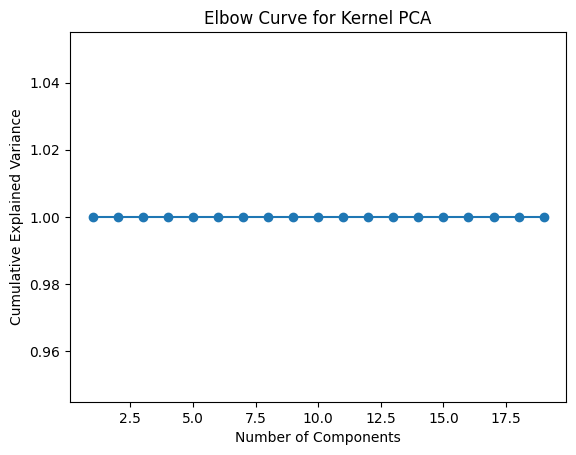

(50, 294)


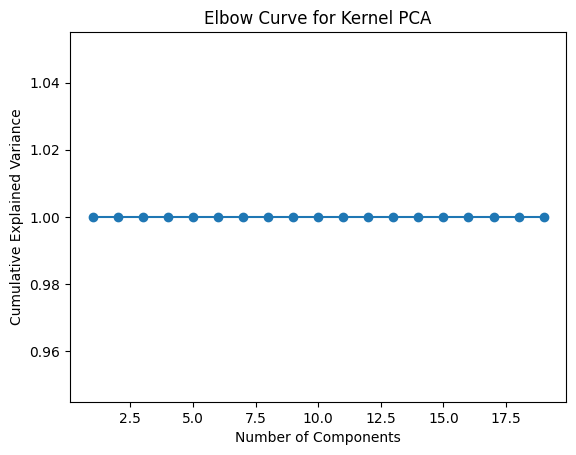

(54, 325)


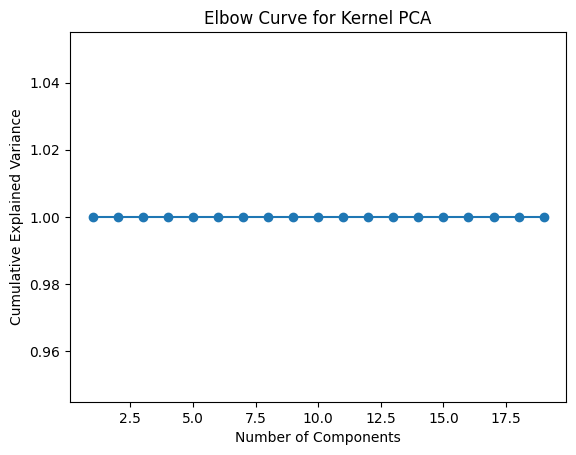

(61, 334)


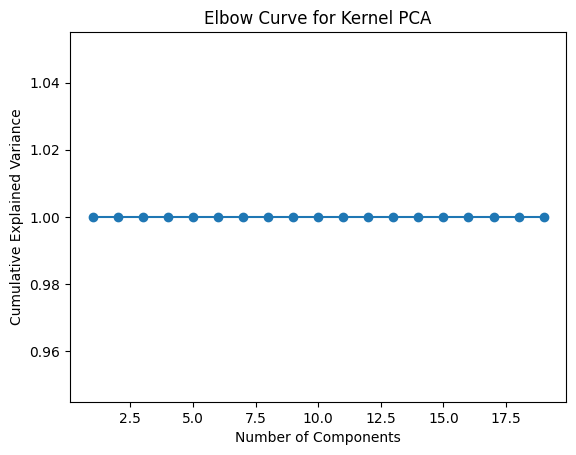

(96, 415)


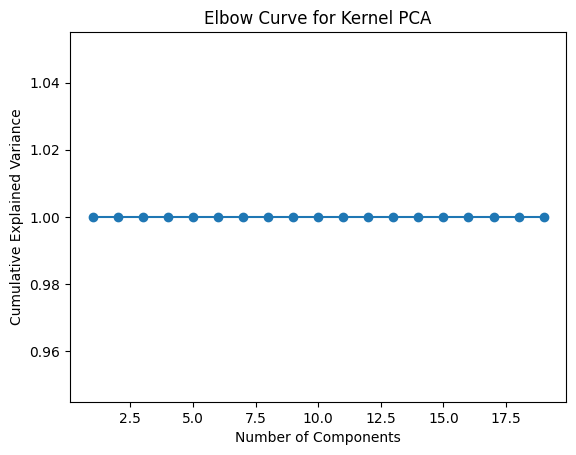

(1402, 396)


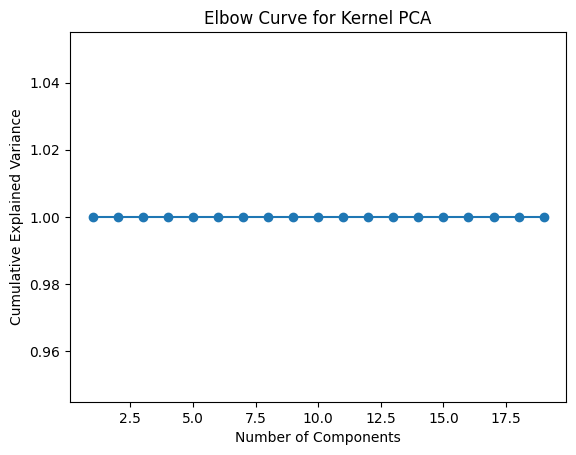

(1411, 394)


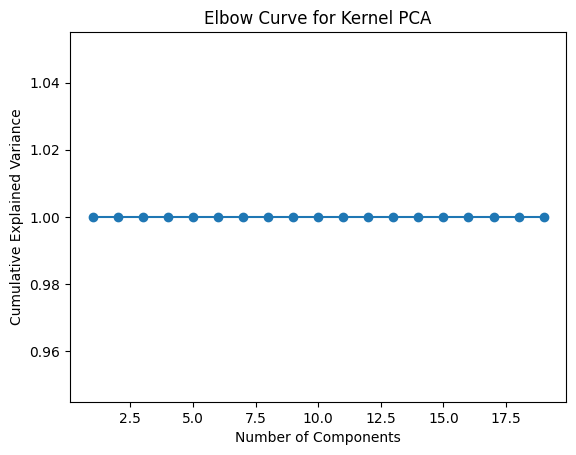

(11197, 446)


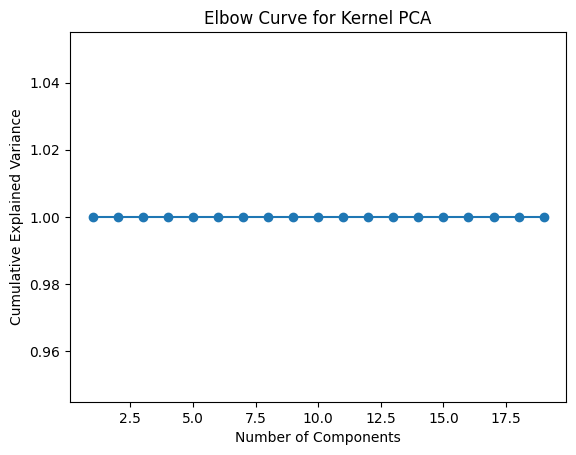

(14010, 446)


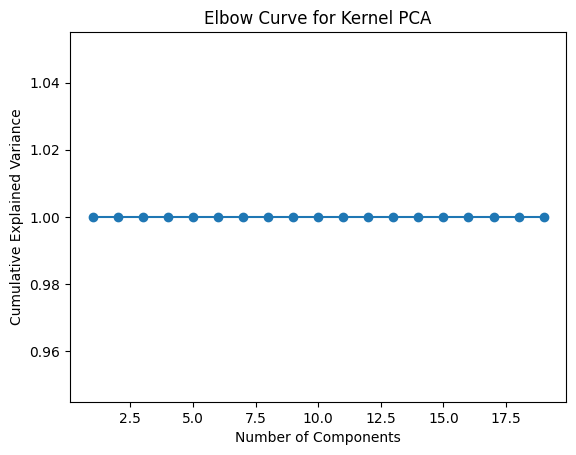

(28321, 446)


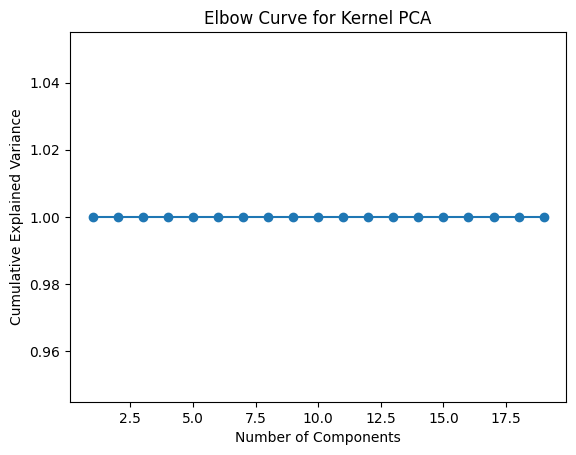

In [ ]:
for dfPCA in listOfDfPCAs:
  X = dfPCA.values
  print(X.shape)
  X_scaled = normalize(X, axis=1, norm='l2')
  explained_variances = []
  n_components_range = range(1, 20)

  for n_components in n_components_range:
    kpca = KernelPCA(n_components=n_components, kernel='cosine', random_state=33)
    X_kpca = kpca.fit_transform(X_scaled)
    explained_variance = np.var(X_kpca, axis=0)
    explained_variance_ratio = explained_variance / np.sum(explained_variance)
    explained_variances.append(np.sum(explained_variance_ratio))

  plt.plot(n_components_range, explained_variances, marker='o')
  plt.xlabel('Number of Components')
  plt.ylabel('Cumulative Explained Variance')
  plt.title('Elbow Curve for Kernel PCA')
  plt.show()

In [ ]:
for dfPCA in listOfDfPCAs:
  X = dfPCA.values
  print(X.shape)
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)
  kpca_1 = KernelPCA(n_components=1, kernel='cosine', random_state=33)
  X_kpca_1 = kpca_1.fit_transform(X_scaled)
  dfPCA['compressedNR_1'] = X_kpca_1
  print(dfPCA.head())
  print()

(43, 399)
   d1   d2   d3   d4   d5   d6   d7   d8   d9  d10  ...  d391  d392  d393  \
0  73  110   32  116  104  101   32  110  101  120  ...   0.0   0.0   0.0   
1  32   84  104  105  115   32  112  104  101  110  ...   0.0   0.0   0.0   
2  32   80  101  111  112  108  101   32  104   97  ...   0.0   0.0   0.0   
3  32   87  101   32   97  114  101   32  109  111  ...   0.0   0.0   0.0   
4  32   79  117  114   32  103  114   97  110  100  ...   0.0   0.0   0.0   

   d394  d395  d396  d397  d398  d399  compressedNR_1  
0   0.0   0.0   0.0   0.0   0.0   0.0       -0.321529  
1   0.0   0.0   0.0   0.0   0.0   0.0       -0.522465  
2   0.0   0.0   0.0   0.0   0.0   0.0        0.255206  
3   0.0   0.0   0.0   0.0   0.0   0.0        0.585140  
4   0.0   0.0   0.0   0.0   0.0   0.0       -0.473071  

[5 rows x 400 columns]

(50, 294)
   d1   d2   d3   d4   d5   d6   d7   d8   d9  d10  ...  d286  d287  d288  \
0  65  115   32  108   97  116  101   32   97  115  ...   0.0   0.0   0.0   
1 

In [ ]:
 all_data_to_one = pd.concat([df['compressedNR_1'] for df in listOfDfPCAs], ignore_index=True)
 all_data_to_one.shape

(56645,)

In [ ]:
oneArray = all_data_to_one.to_numpy()
xAxis = np.arange(oneArray.shape[0])
fig = px.line(x=xAxis, y=oneArray, title='Line Plot')
fig.show()

In [ ]:
for dfPCA in listOfDfPCAs:
  X = dfPCA.values
  print(X.shape)
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)
  kpca_17 = KernelPCA(n_components=17, kernel='cosine', random_state=33)
  X_kpca_17 = kpca_17.fit_transform(X_scaled)
  dfPCA['compressedNR_17'] = list(X_kpca_17)
  print(dfPCA.head())
  print()

(43, 400)
   d1   d2   d3   d4   d5   d6   d7   d8   d9  d10  ...  d392  d393  d394  \
0  73  110   32  116  104  101   32  110  101  120  ...   0.0   0.0   0.0   
1  32   84  104  105  115   32  112  104  101  110  ...   0.0   0.0   0.0   
2  32   80  101  111  112  108  101   32  104   97  ...   0.0   0.0   0.0   
3  32   87  101   32   97  114  101   32  109  111  ...   0.0   0.0   0.0   
4  32   79  117  114   32  103  114   97  110  100  ...   0.0   0.0   0.0   

   d395  d396  d397  d398  d399  compressedNR_1  \
0   0.0   0.0   0.0   0.0   0.0       -0.321529   
1   0.0   0.0   0.0   0.0   0.0       -0.522465   
2   0.0   0.0   0.0   0.0   0.0        0.255206   
3   0.0   0.0   0.0   0.0   0.0        0.585140   
4   0.0   0.0   0.0   0.0   0.0       -0.473071   

                                     compressedNR_17  
0  [-0.32465419796888123, -0.18289298382193653, 0...  
1  [-0.5245290667343793, 0.4547476227473168, -0.2...  
2  [0.2613989287505268, -0.360425929067764, -0.08...  


In [ ]:
all_data_to_seventeen = pd.concat([df['compressedNR_17'] for df in listOfDfPCAs], ignore_index=True)
all_data_to_seventeen.shape

(56645,)

In [ ]:
seventeenArray = all_data_to_one.to_numpy()
xAxis = np.arange(seventeenArray.shape[0])
fig = px.line(x=xAxis, y=seventeenArray, title='Line Plot')
fig.show()

# ASCII codes for Lexical Cateogries

In [ ]:
avolc = pd.read_csv('/content/drive/MyDrive/ds680/reducedASCIIofLexCats.csv')
# aciivaluesoflexicalcategories
# Done on https://colab.research.google.com/drive/1iPlRMQIlAQRaEp01iDamGv0oWNfcSJeD?usp=share_link
# using Oxford's API
print(avolc.shape)
avolc.head()

(17, 3)


lexCat                                           lexASCII  \
0  Abbreviation  [65, 98, 98, 114, 101, 118, 105, 97, 116, 105,...   
1     Adjective        [65, 100, 106, 101, 99, 116, 105, 118, 101]   
2    Adposition  [65, 100, 112, 111, 115, 105, 116, 105, 111, 110]   
3        Adverb                       [65, 100, 118, 101, 114, 98]   
4         Affix                           [65, 102, 102, 105, 120]   

   reducedASCII  
0      0.715901  
1      0.286725  
2      0.664445  
3     -0.592642  
4     -0.593880

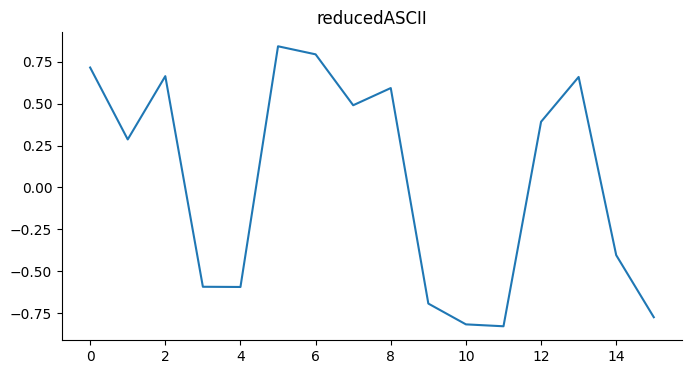

In [ ]:
# @title reducedASCII

from matplotlib import pyplot as plt
avolc['reducedASCII'].plot(kind='line', figsize=(8, 4), title='reducedASCII')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
lexCat = avolc['lexCat'].tolist()
print(lexCat)

['Abbreviation', 'Adjective', 'Adposition', 'Adverb', 'Affix', 'Conjunction', 'Contraction', 'Determiner', 'Interjection', 'Noun', 'Other', 'Phrase', 'Predeterminer', 'Preposition', 'Pronoun', 'Symbol', 'Verb']


In [ ]:
#RA - reducedASCII
lexCatInRA = np.array(avolc['reducedASCII'].tolist())
print(lexCatInRA)

[ 0.71590091  0.2867249   0.66444542 -0.592642   -0.59387992  0.84275472
  0.79462763  0.49076816  0.59344712 -0.69295269 -0.81704743 -0.82846908
  0.39217374  0.659702   -0.40400667 -0.73709869 -0.77444813]


In [ ]:
for i, dfPCA in enumerate(listOfDfPCAs):
  dfPCA['dotProduct'] = dfPCA['compressedNR_17'].apply(lambda x: np.dot(x, lexCatInRA))
  fig = px.histogram(dfPCA, x='dotProduct',
                   title='Histogram of Dot Product Values',
                   labels={'dotProduct': 'Value'},
                   nbins=20)  # Adjust nbins for more or fewer bins
  fig.show()
  print()

In [ ]:
listOfDfPCAs[0].head()

d1   d2   d3   d4   d5   d6   d7   d8   d9  d10  ...  d393  d394  d395  \
0  73  110   32  116  104  101   32  110  101  120  ...   0.0   0.0   0.0   
1  32   84  104  105  115   32  112  104  101  110  ...   0.0   0.0   0.0   
2  32   80  101  111  112  108  101   32  104   97  ...   0.0   0.0   0.0   
3  32   87  101   32   97  114  101   32  109  111  ...   0.0   0.0   0.0   
4  32   79  117  114   32  103  114   97  110  100  ...   0.0   0.0   0.0   

   d396  d397  d398  d399  compressedNR_1  \
0   0.0   0.0   0.0   0.0       -0.321529   
1   0.0   0.0   0.0   0.0       -0.522465   
2   0.0   0.0   0.0   0.0        0.255206   
3   0.0   0.0   0.0   0.0        0.585140   
4   0.0   0.0   0.0   0.0       -0.473071   

                                     compressedNR_17  dotProduct  
0  [-0.32465419796888123, -0.18289298382193653, 0...   -0.520162  
1  [-0.5245290667343793, 0.4547476227473168, -0.2...   -0.792539  
2  [0.2613989287505268, -0.360425929067764, -0.08...    0.140595  
3  [0.5849523298032084, 0.4786675466233388, 0.393...    0.586246  
4  [-0.47628924412245477, 0.17894766898746825, -0...    0.418290  

[5 rows x 402 columns]

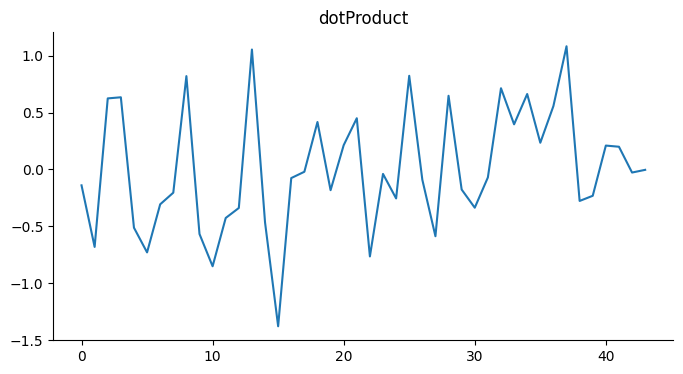

In [ ]:
# @title dotProduct

from matplotlib import pyplot as plt
sentencesDf['dotProduct'].plot(kind='line', figsize=(8, 4), title='dotProduct')
plt.gca().spines[['top', 'right']].set_visible(False)

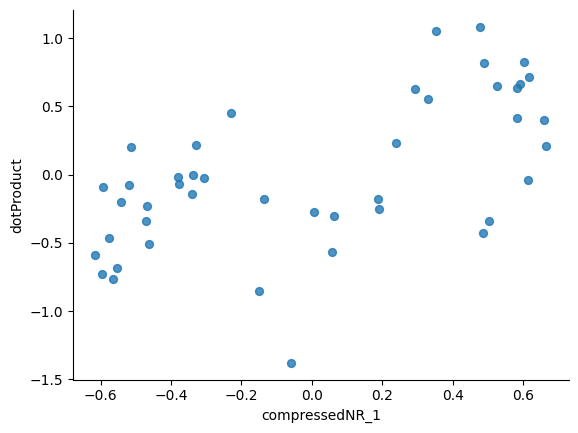

In [ ]:
# @title compressedNR_1 vs dotProduct

from matplotlib import pyplot as plt
sentencesDf.plot(kind='scatter', x='compressedNR_1', y='dotProduct', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

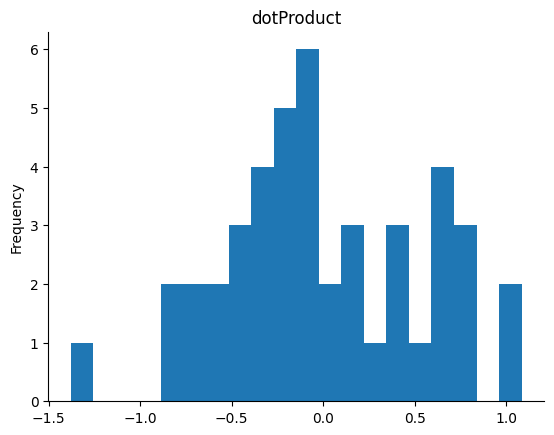

In [ ]:
# @title dotProduct

from matplotlib import pyplot as plt
sentencesDf['dotProduct'].plot(kind='hist', bins=20, title='dotProduct')
plt.gca().spines[['top', 'right',]].set_visible(False)

okay.

In [ ]:
def cosineSimilarity(a, b):
  dot_product = np.dot(a, b)
  norm_a = np.linalg.norm(a)
  norm_b = np.linalg.norm(b)
  return dot_product / (norm_a * norm_b)

for dfPCA in listOfDfPCAs:
  dfPCA['cosineSimilarity'] = dfPCA['compressedNR_17'].apply(lambda x: cosineSimilarity(x, lexCatInRA))
  dfPCA.head()
  fig = px.histogram(dfPCA, x='cosineSimilarity',
                   title='Histogram of Cosine Similarity Values',
                   labels={'cosineSimilarity': 'Value'},
                   nbins=20)  # Adjust nbins for more or fewer bins
  fig.show()

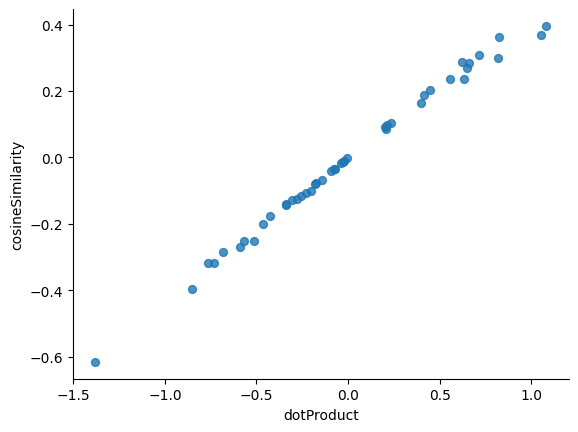

In [ ]:
# @title dotProduct vs cosineSimilarity

from matplotlib import pyplot as plt
sentencesDf.plot(kind='scatter', x='dotProduct', y='cosineSimilarity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

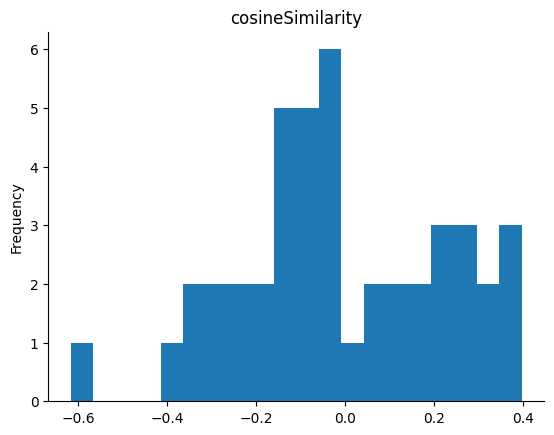

In [ ]:
# @title cosineSimilarity

from matplotlib import pyplot as plt
sentencesDf['cosineSimilarity'].plot(kind='hist', bins=20, title='cosineSimilarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

From Gemini :
Cosine similarity is generally a better choice because it focuses on the similarity of the directions of the vectors, rather than their magnitudes. This helps to capture the semantic similarity between sentences, regardless of their lengths or word frequencies.

[A recorded overview for Sam Atman's blog on Intelligence Age.](https://drive.google.com/file/d/1DaPZES-zfBWtITu0E_UYbK9BMHs1Qoyu/view?usp=share_link)